##### [Task](https://en.wikipedia.org/wiki/Sorting_algorithm) (5 + 5 + 5 + 5 = 20 Points)

In [ ]:
""" 
    topic: sorting algorithms

    compare the runtime of the discussed sorting algorithms

    input: array
    output: sorted array

    a) bubblesort

    b) mergesort

    c) quicksort

    d) visualization
        - for n ∈ {4, 8, ..., 2^15} uniform distributed numbers
        - runtime (in s) - n (# numbers)
        - plot with matplotlib
            - pyplot.loglog
            - legend
            - axes
            - title

"""

#### [Bubblesort](https://en.wikipedia.org/wiki/Bubble_sort)

In [6]:
def bubblesort(array):
    arr_length = len(array)
    for i in range(arr_length):
        sorted = True
        for j in range(arr_length - i - 1):
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
                sorted = False
        if sorted:
            break
    return array

#### [Mergesort](https://en.wikipedia.org/wiki/Merge_sort)

In [7]:
def split(array):
    splitting_at = len(array) // 2
    return array[:splitting_at], array[splitting_at:]

def merge(LeftSide, RightSide):
    merged = []
    left,right = len(LeftSide), len(RightSide)
    i_ctr, j_ctr = 0,0
    while i_ctr < left and j_ctr < right:
        if LeftSide[i_ctr] < RightSide[j_ctr]:
            merged.append(LeftSide[i_ctr])
            i_ctr += 1
        else:
            merged.append(RightSide[j_ctr])
            j_ctr += 1
    merged.extend(LeftSide[i_ctr:])
    merged.extend(RightSide[j_ctr:])
    return merged

def mergesort(array):
    if len(array) <= 1:
        return array

    left, right = split(array)
    left = mergesort(left)
    right = mergesort(right)
    return merge(left, right)

#### [Quicksort](https://en.wikipedia.org/wiki/Quicksort)

In [8]:
def quicksort(array):
    if len(array) <= 1:
        return array

    pivot = array[-1]
    LeftSide, RightSide = [],[]
    for element in array[:-1]:
        if element <= pivot:
            LeftSide.append(element)
        else:
            RightSide.append(element)

    sorted_left = quicksort(LeftSide)
    sorted_right = quicksort(RightSide)
    return sorted_left + [pivot] + sorted_right

#### Visualization

In [32]:
import numpy as np
import timeit
from tqdm import tqdm


# a range was not specified, that's why we decided to use the range 1 to 100
start = 1
end = 100
numbers= [2 ** i for i in range(2,16)]

In [39]:
bsort_y = []
for number in tqdm(numbers,desc="Processing", ncols=100, bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]"):
    uniform_arr = np.random.uniform(start,end,number)
    start_timer = timeit.default_timer()
    bubblesort(uniform_arr)
    end_timer = timeit.default_timer()
    time = (end_timer - start_timer) / 1000
    bsort_y.append(time)

Processing: 100%|██████████████████████████████████████████████████████████████| 14/14 [02:08<00:00]


In [40]:
bsort_y

[2.479203976690769e-08,
 1.874985173344612e-08,
 2.4541048333048822e-08,
 2.6870798319578173e-07,
 7.816669531166553e-07,
 3.0104999896138906e-06,
 1.0538832983002066e-05,
 3.2230916898697614e-05,
 9.693479095585644e-05,
 0.0003773197499103844,
 0.0015157197918742895,
 0.0059252508338540795,
 0.024048501749988644,
 0.09670266925008036]

In [41]:
msort_y = []
for number in tqdm(numbers,desc="Processing", ncols=100, bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]"):
    uniform_arr = np.random.uniform(start,end,number)
    start_timer = timeit.default_timer()
    mergesort(uniform_arr)
    end_timer = timeit.default_timer()
    time = (end_timer - start_timer) / 1000
    msort_y.append(time)

Processing: 100%|██████████████████████████████████████████████████████████████| 14/14 [00:00<00:00]


In [42]:
msort_y

[2.2707972675561905e-08,
 2.1749874576926233e-08,
 4.3499981984496114e-08,
 9.208312258124352e-08,
 1.705000177025795e-07,
 2.97625083476305e-07,
 6.088328082114458e-07,
 1.265833154320717e-06,
 2.6093339547514917e-06,
 5.077250069007277e-06,
 9.42237488925457e-06,
 1.7867458052933216e-05,
 2.9861000133678317e-05,
 5.1454958971589806e-05]

In [43]:
qsort_y = []
for number in tqdm(numbers,desc="Processing", ncols=100, bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}]"):
    uniform_arr = np.random.uniform(start,end,number)
    start_timer = timeit.default_timer()
    quicksort(uniform_arr)
    end_timer = timeit.default_timer()
    time = (end_timer - start_timer) / 1000
    qsort_y.append(time)

Processing: 100%|██████████████████████████████████████████████████████████████| 14/14 [00:00<00:00]


In [44]:
qsort_y

[1.3665994629263878e-08,
 8.00006091594696e-09,
 1.2875068932771683e-08,
 2.5541987270116806e-08,
 5.158386193215847e-08,
 1.0225013829767704e-07,
 2.3629190400242805e-07,
 5.139999557286501e-07,
 1.0196249932050706e-06,
 2.21633305773139e-06,
 4.240665817633271e-06,
 8.369249990209937e-06,
 1.4976416015997528e-05,
 2.7584041934460403e-05]

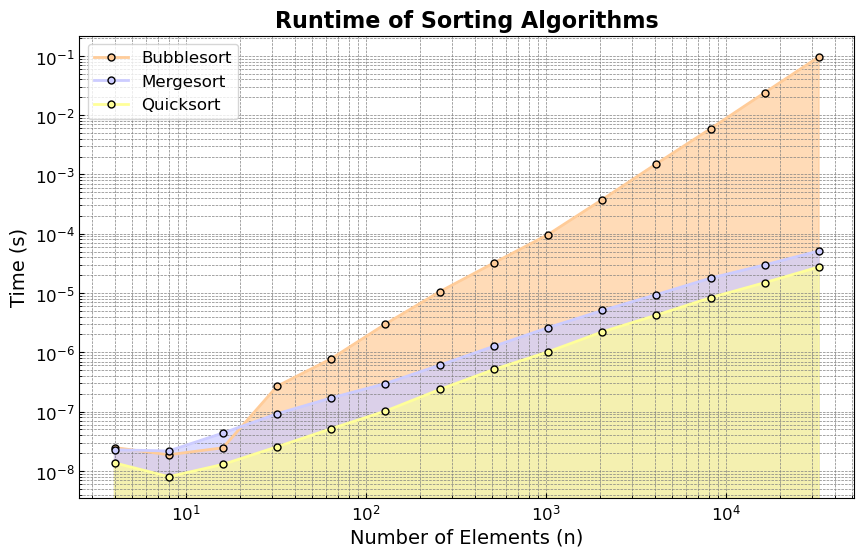

In [90]:
import matplotlib.pyplot as plt

figsize = (10,6)
fig, ax = plt.subplots(figsize=figsize)


colors = ['#FFCC99', '#CCCCFF','#FFFF99']
hatch_pattern = '\\'
dataset = [bsort_y, msort_y, qsort_y]
names = ['Bubblesort', 'Mergesort', 'Quicksort']

for i, (algorithm, data, color) in enumerate(zip(names, dataset, colors)):
    ax.loglog(numbers, data, label=algorithm, color=color, linewidth=2, markersize=5, markeredgecolor='black', marker='o', linestyle='-')
    ax.fill_between(numbers, data, color=color, alpha=0.7)

ax.set_title("Runtime of Sorting Algorithms", fontsize=16, fontweight='bold')
ax.set_xlabel("Number of Elements (n)", fontsize=14)
ax.set_ylabel("Time (s)", fontsize=14)
ax.legend(fontsize=12)

ax.grid(which='both', linestyle='--', linewidth=0.5, color='gray')
ax.tick_params(axis='both', which='both', direction='in', labelsize=12)


plt.show()
